In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Dataset

data = pd.read_csv('911.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
#Analysis 1 - Top 5 Zipcodes and Townships for 911 calls

zip_5most = data['zip'].value_counts().head(5)
twp_5most = data['twp'].value_counts().head(5)
print(zip_5most)
print('--'*20)
print(twp_5most)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64
----------------------------------------
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


In [4]:
#Analysis 2 - Extracting The Reasons of 911 calls out of 'title' column thereby making a Graph for Top 3 Reasons for 911 calls.

data['title'].nunique()

110

In [5]:
reason = data['title'].iloc[0]
reason.split(':')[0]

'EMS'

In [6]:
data['Reasons'] = data['title'].apply(lambda title: title.split(':')[0])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64


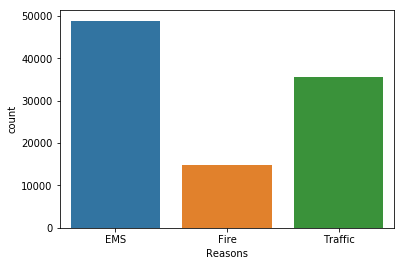

In [7]:
reasons_5most = data['Reasons'].value_counts().head(3)
print(reasons_5most)
sns.countplot(x = 'Reasons', data = data)

In [8]:
#Analysis 3 - Distribute the column 'timestamp' into Hours, Month, Day and Plot 2 different Graphs for Month, Day column with the hue based off of the 'Reason' column

type(data['timeStamp'].iloc[0])
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
time = data['timeStamp'].iloc[0]
print("Hour is {0} Month is {1} and Day is {2}".format(time.hour, time.month, time.dayofweek))

Hour is 17 Month is 12 and Day is 3


In [10]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [11]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [12]:
Daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day'] = data['Day'].map(Daymap)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


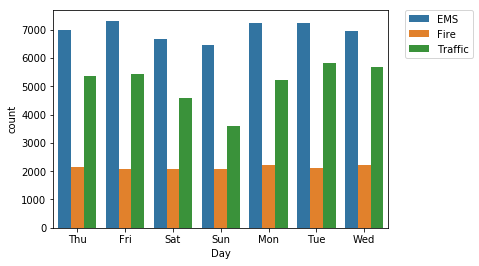

In [13]:
sns.countplot(x = 'Day', data = data, hue = 'Reasons')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)

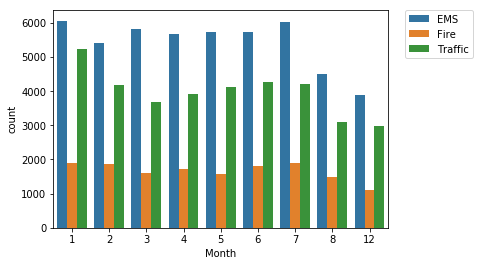

In [14]:
sns.countplot(x = 'Month', data = data, hue = 'Reasons')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)

In [15]:
#Some Months are missing in the above graph for that we are plotting a different graph.

databymonth = data.groupby('Month').count()
databymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


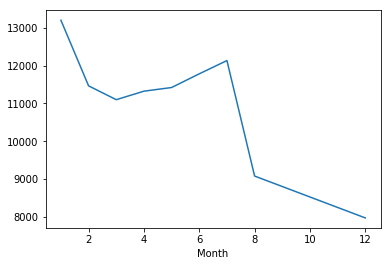

In [16]:
databymonth['lat'].plot()

/home/ps12978/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


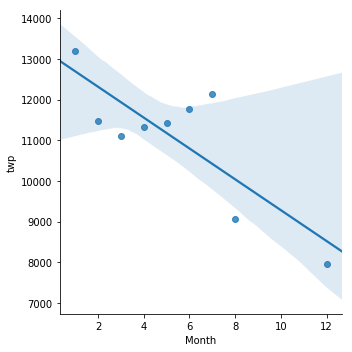

In [17]:
#Analysis 4 - Create a linear fit on the number of calls per month. Also create 'Date' column from 'timestamp' and create 3 graphs which are grouped by 'Date' with each graph representing a reason for 911 calls.

sns.lmplot(x = 'Month', y = 'twp', data = databymonth.reset_index())

In [18]:
t = data['timeStamp'].iloc[0]
t.date()
data['Date'] = data['timeStamp'].apply(lambda t: t.date())
data.head()
data.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


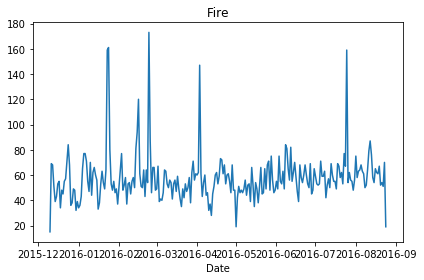

In [19]:
data[data['Reasons'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

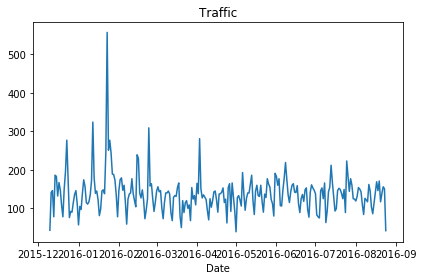

In [20]:
data[data['Reasons'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

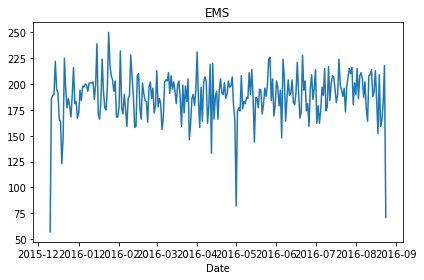

In [21]:
data[data['Reasons'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [22]:
#Analysis 5 - Restructure the DataFrame so that columns become 'Hour/Month' and Index become 'Day' and then Plot the Correlation Graph between them.

Hour_data = data.groupby(by = ['Day', 'Hour']).count()['Reasons'].unstack()
Month_data = data.groupby(by = ['Day', 'Month']).count()['Reasons'].unstack()

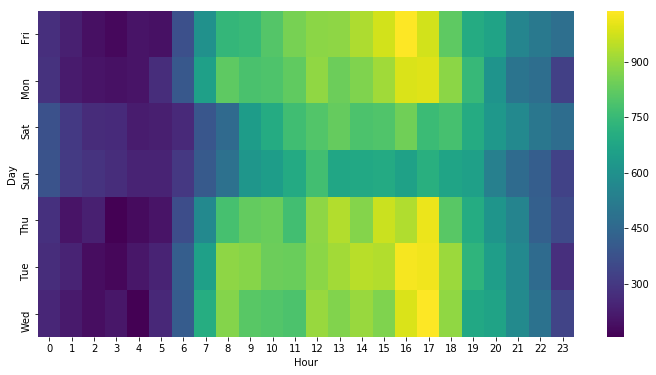

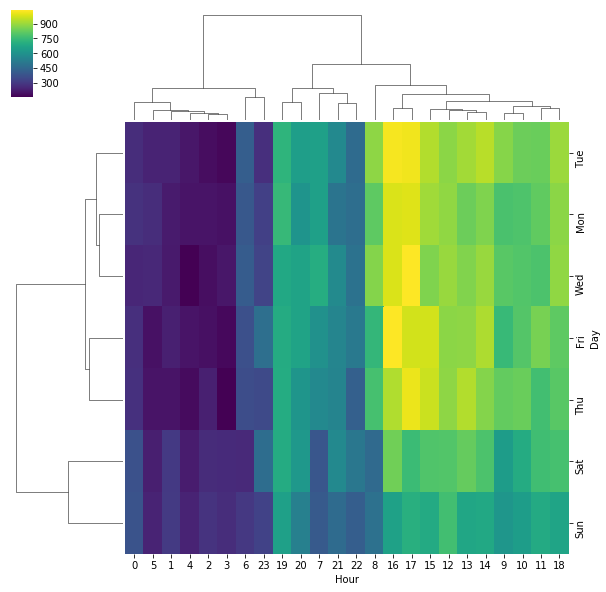

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(Hour_data, cmap = 'viridis')
sns.clustermap(Hour_data, cmap = 'viridis')

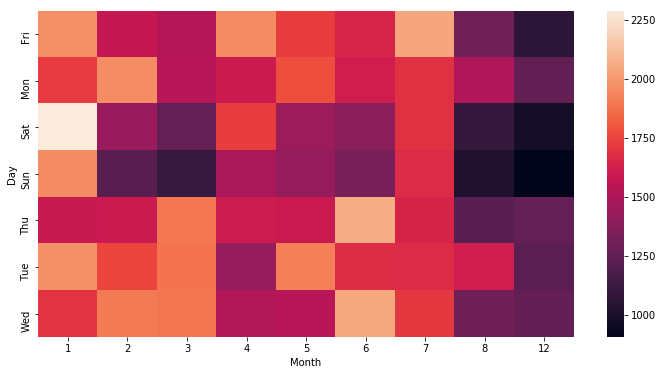

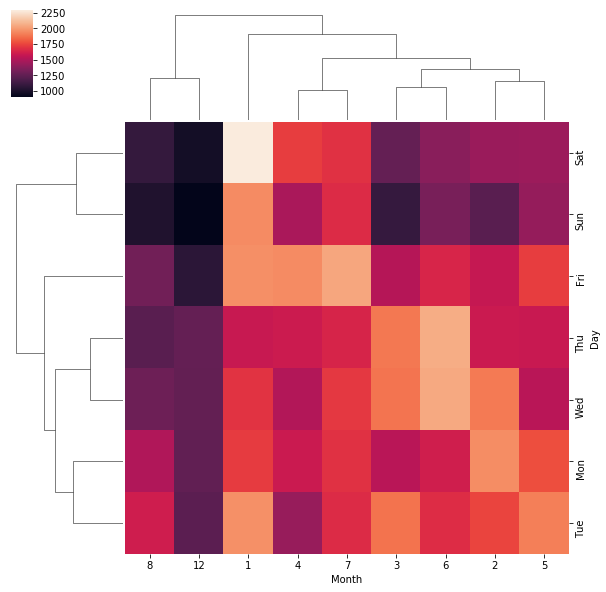

In [24]:
plt.figure(figsize = (12,6))
sns.heatmap(Month_data)
sns.clustermap(Month_data)

From the above analysis we can draw some useful insights from this Dataset. Based on this analysis we can easily have a thorough visualization of Data dependencies and other useful informations which are as follows:

1. From 1st analysis we can easily understand that most of the calls to 911 are made from the following mentioned areas that are from LOWER MERION - 8443, from ABINGTON - 5977, from NORRISTOWN - 5890, from UPPER MERION - 5227 and from CHELTENHAM - 4575.

2. From 2nd analysis we can have a clear look that most of the calls to 911 are made for the following mentioned Reasons that are as follows:- For Emergency Medical Services(EMS) - 48877, For Traffic - 35695 and For Fire-14920.

3. From 3rd analysis we can have a clear look that highest no. of EMS calls are made on Friday, highest no. of Traffic calls are made on Tuesday and highest no. of Fire calls are made on Monday. In addition to that we can also visualize through graph that how the calls are increasing and decreasing from the starting month of the year to the ending month of the year.

4. From 4th analysis again we can easily visualize through those 3 certain graph that how the top 3 Reasons for the 911 calls are interrelated to the Dates on which they are made.

5. From 5th analysis we can have a clear view from the Heatmap graph that how the Hour/Month of the 911 calls are correlated to the Days on which the 911 calls are being made.